# Creating Wordcloud with Mask
### Author: Sean Moch
### 11 Nov 2024

Some of the methods here I learned from the IBM Coursera course Data Visualization with Python.
https://www.coursera.org/learn/python-for-data-visualization/home/info

But I think this is heavily borrowing from the module originator as the example is in their github repo.
https://github.com/amueller/word_cloud/blob/main/examples/masked.py

The files`alice.txt` and `alice_mask.png` should be in the same folder as this notebook.

A Python package already exists in Python for generating `word` clouds. The package, called `wordcloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [word_cloud](https://github.com/amueller/word_cloud/).

Let's use this package to learn how to generate a word cloud for a given text document.

You can install using mamba/conda or pip.


In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
# !mamba install wordcloud

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

Read in the text and mask

In [4]:
# Read the whole text.
alice_text = open("alice.txt").read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open("alice_mask.png"))

Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.

In [5]:
stopwords = set(STOPWORDS)

In [6]:
# instantiate a word cloud object
alice_wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_text)

Now the wordcloud is generated, we just need to display it.

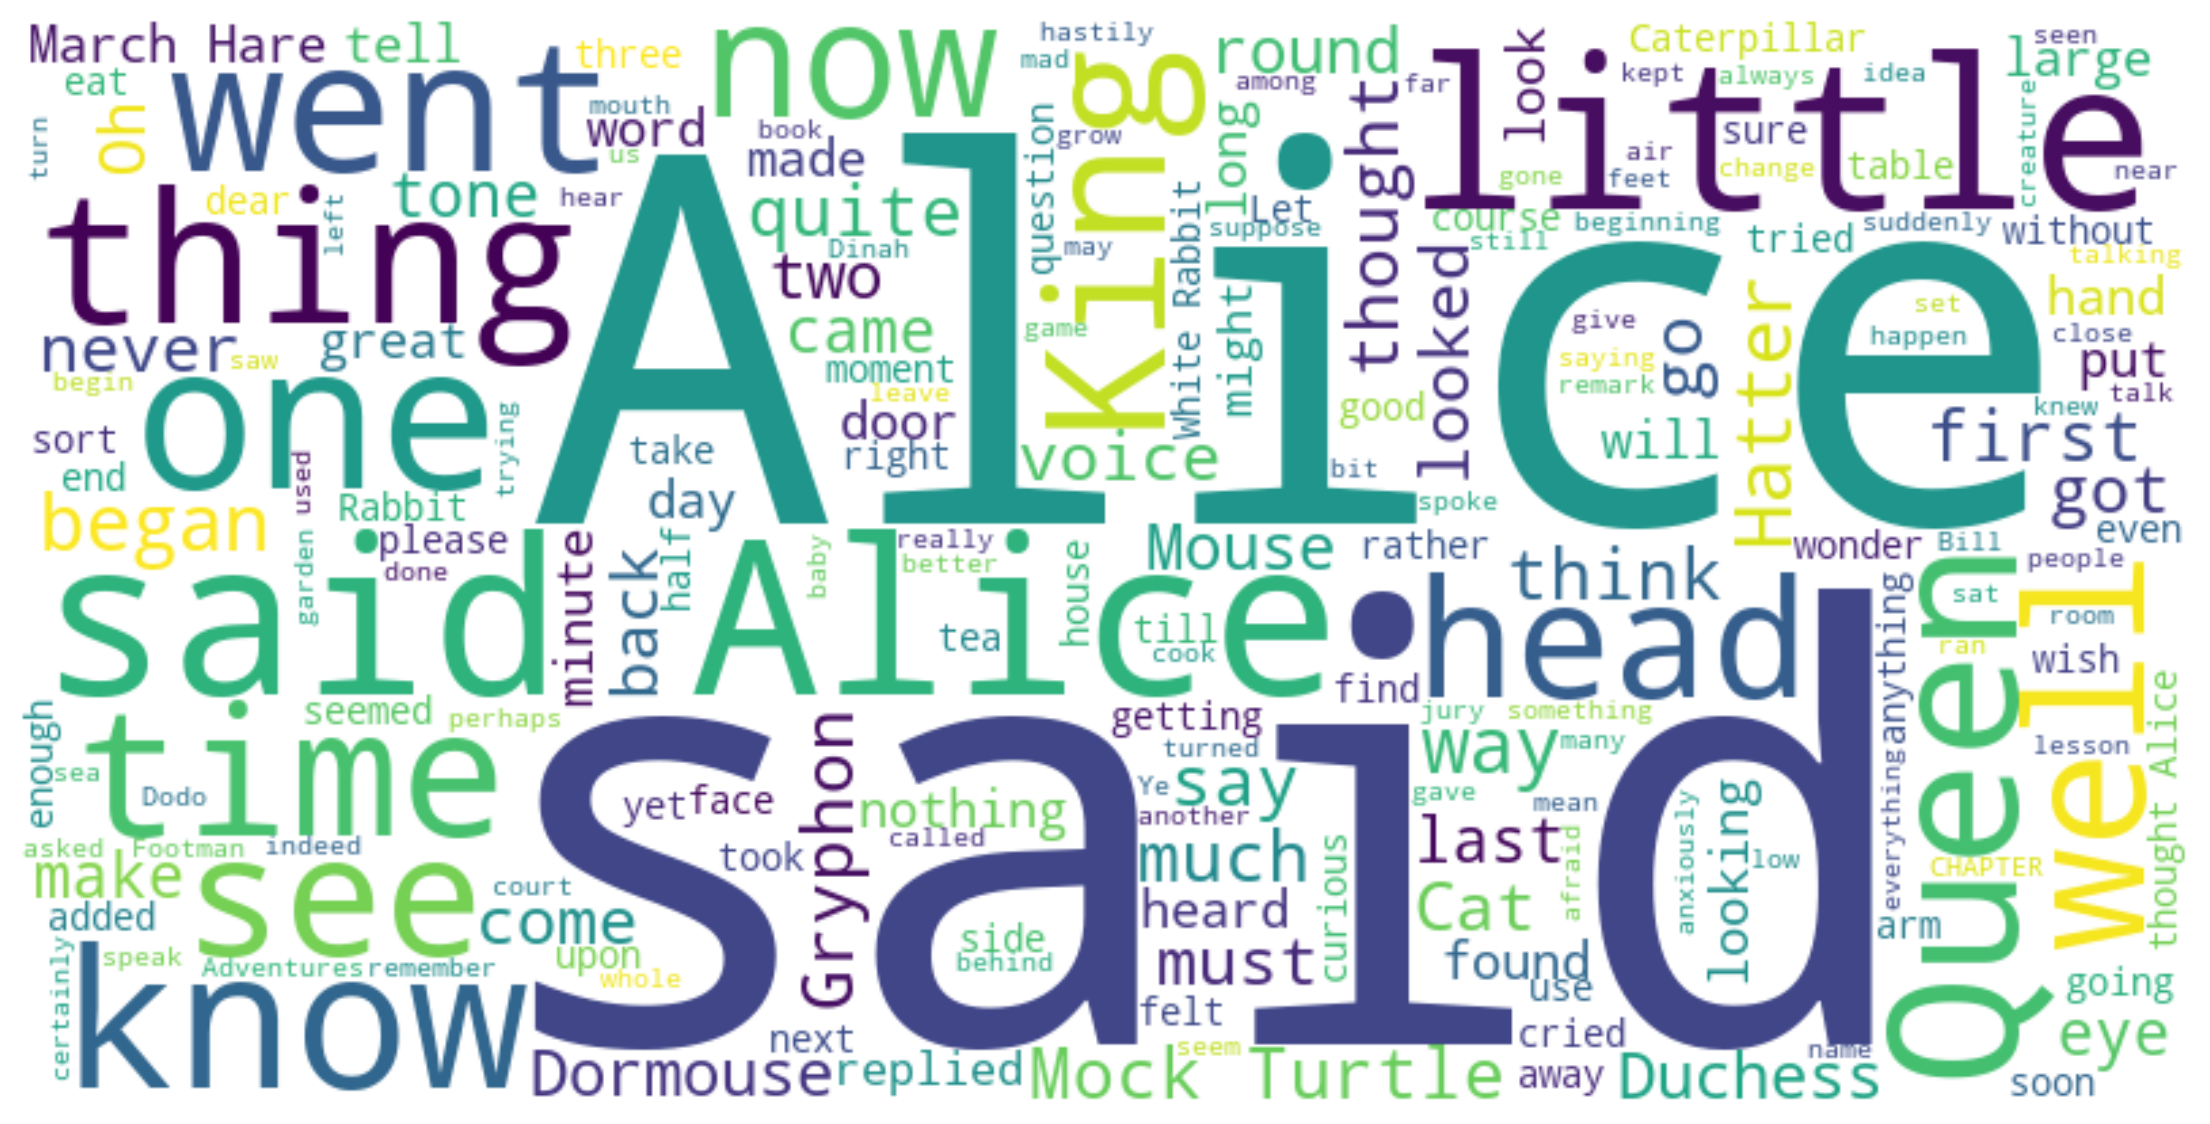

In [7]:
# display the word cloud
fig = plt.figure(figsize=(14, 18))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Lets add `said` to the stopwords and regenerate

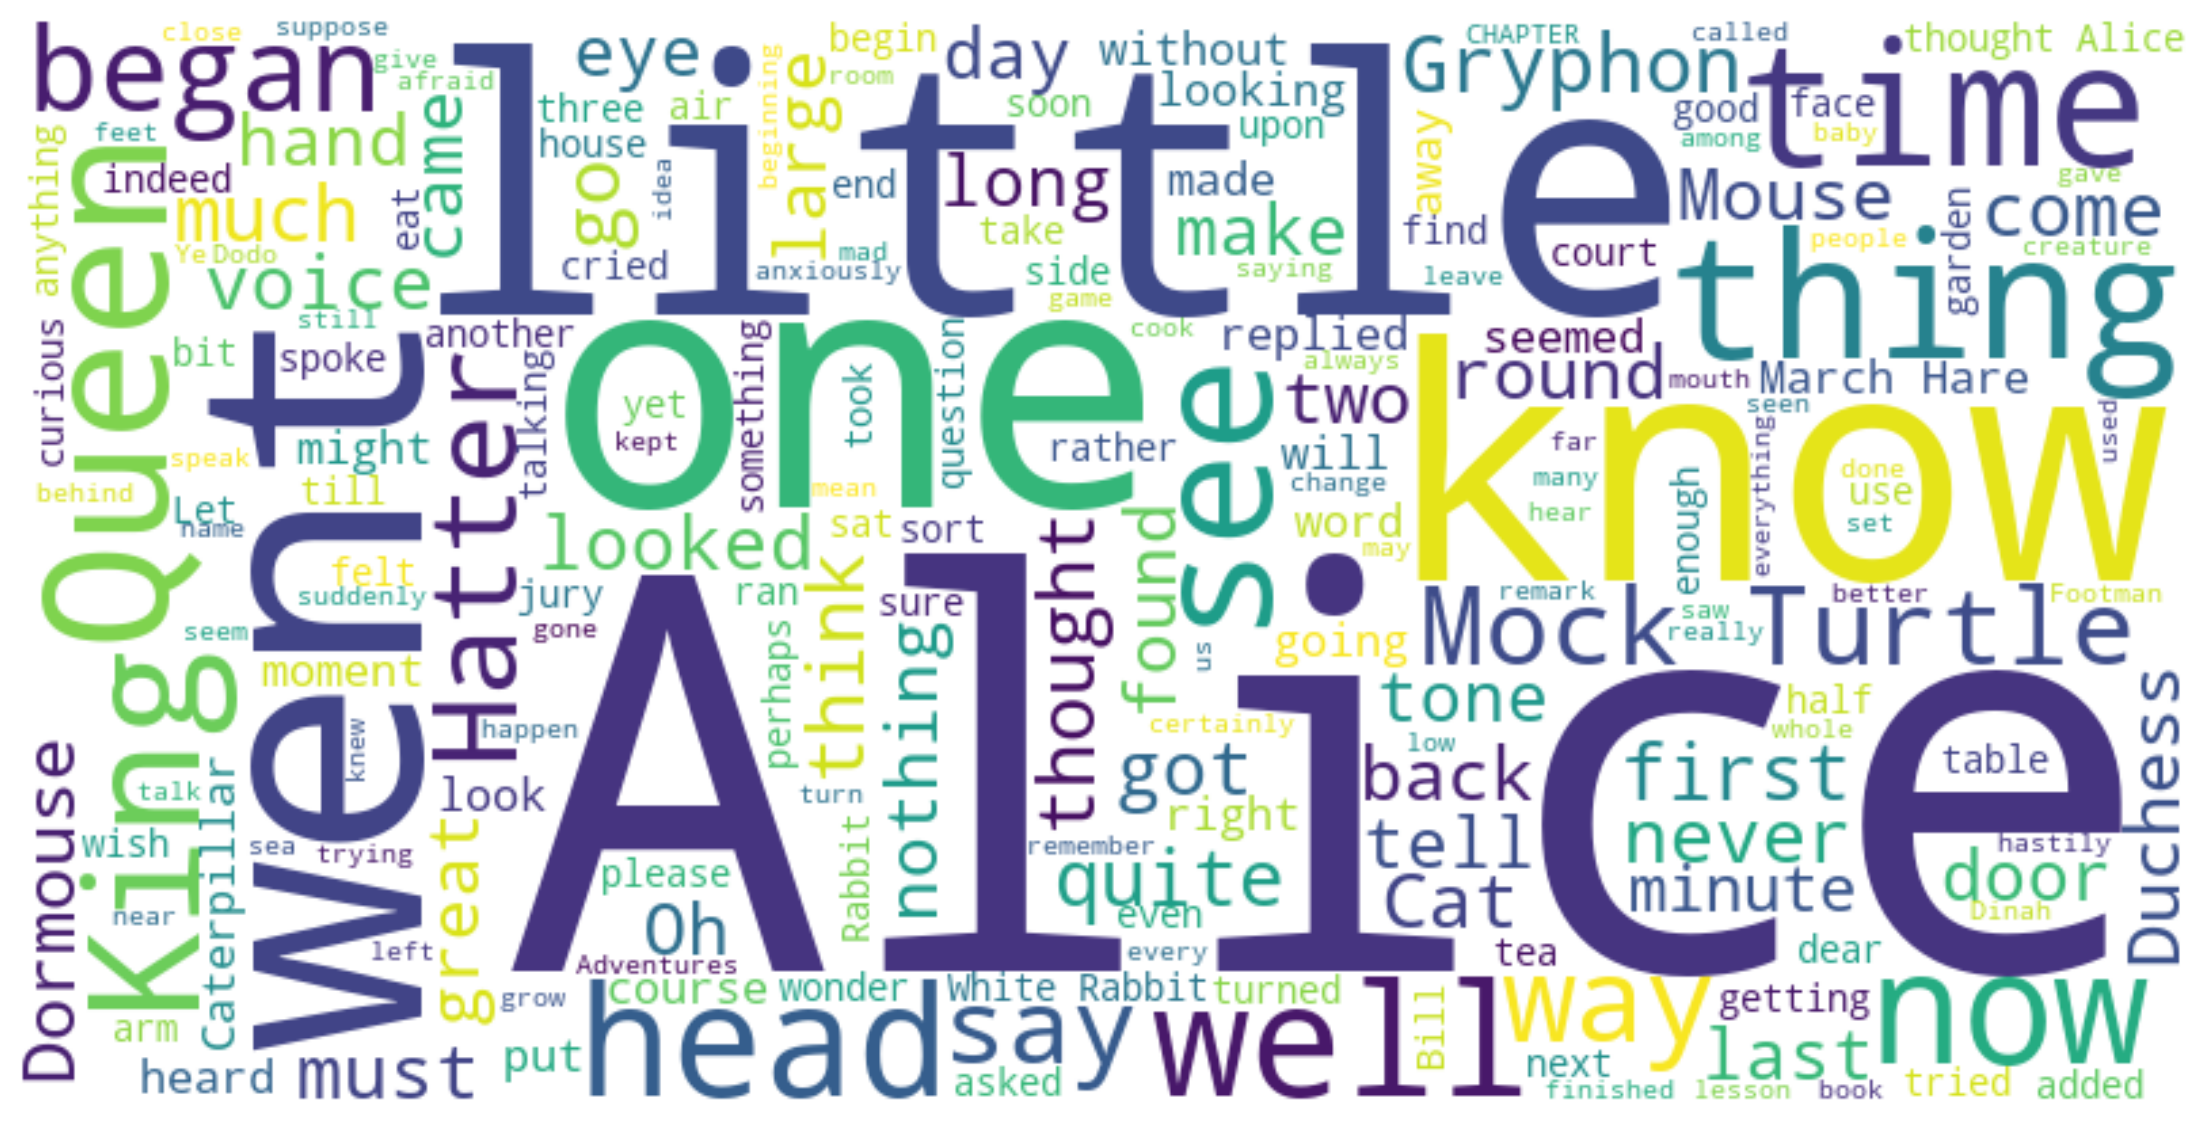

In [8]:
stopwords.add('said')

# re-generate the word cloud
alice_wc.generate(alice_text)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Now lets add the mask and display the new wordcloud

In [9]:
alice_masked_wc = WordCloud(background_color="white", mask=alice_mask,
               stopwords=stopwords)

In [10]:
# generate the word cloud
alice_masked_wc.generate(alice_text)


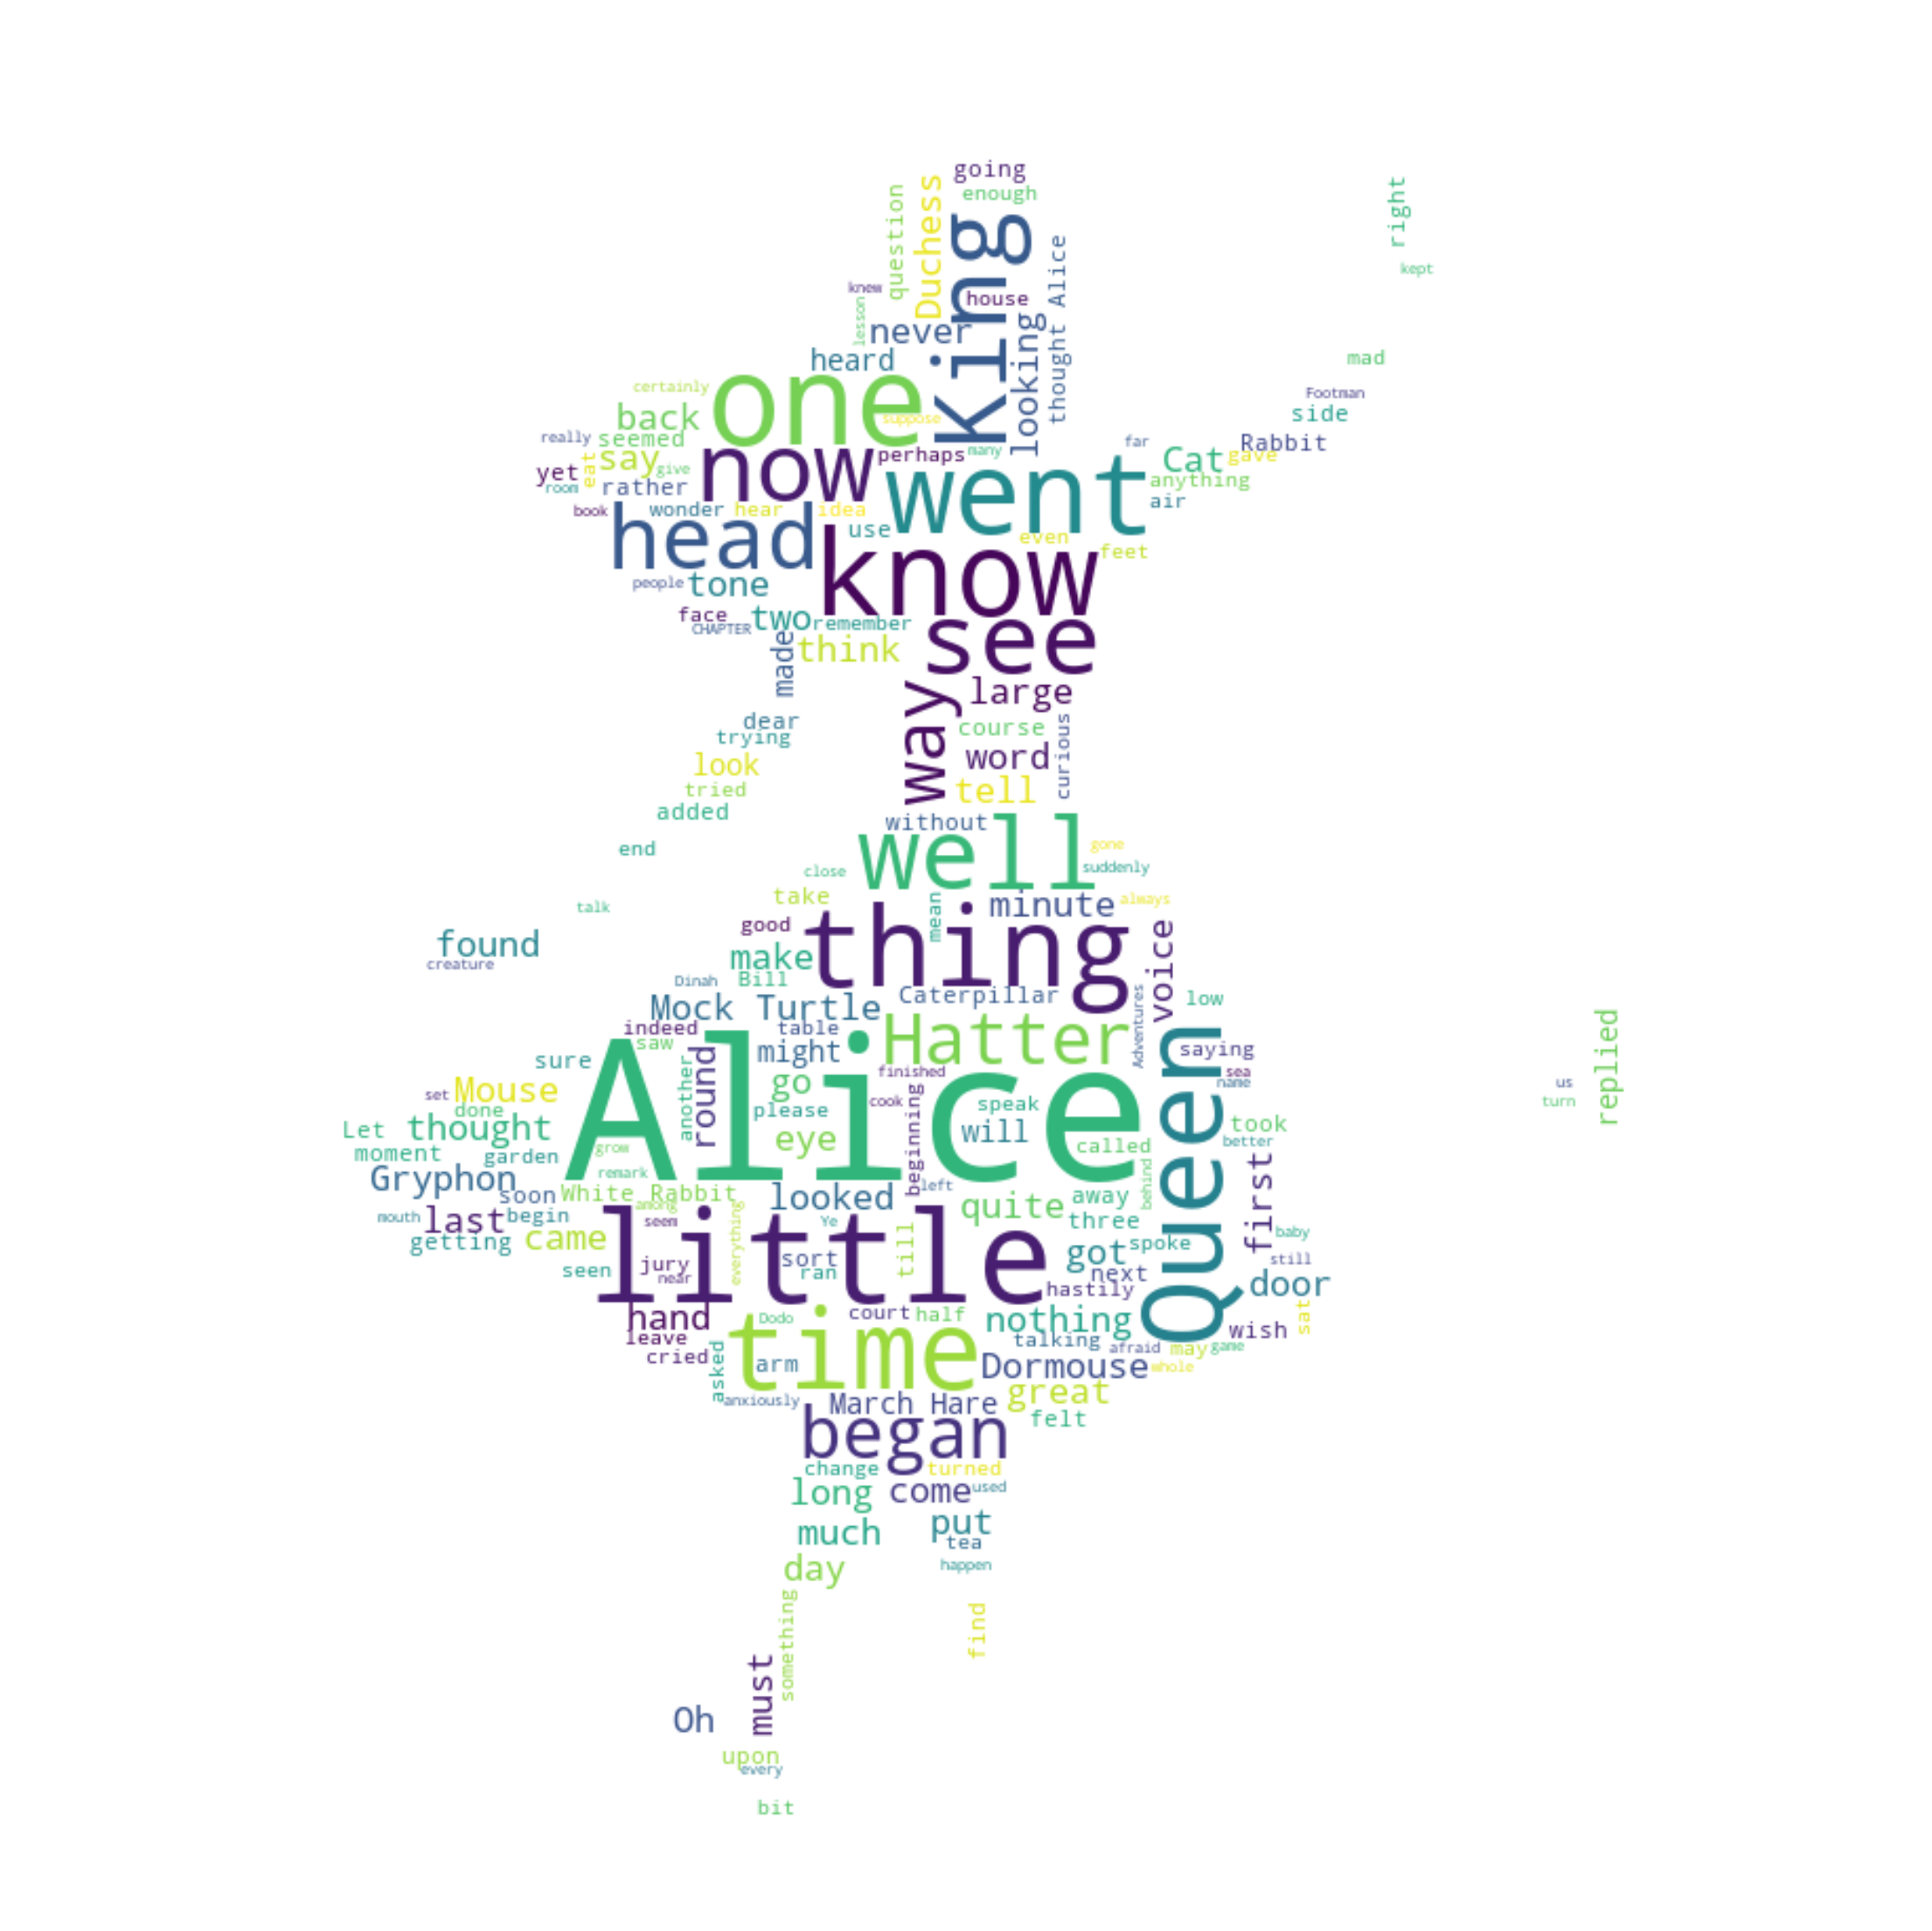

In [11]:
# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_masked_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
#saving is easy
# store to file
alice_masked_wc.to_file("alice_masked.png")

You can also add a countour border around the mask

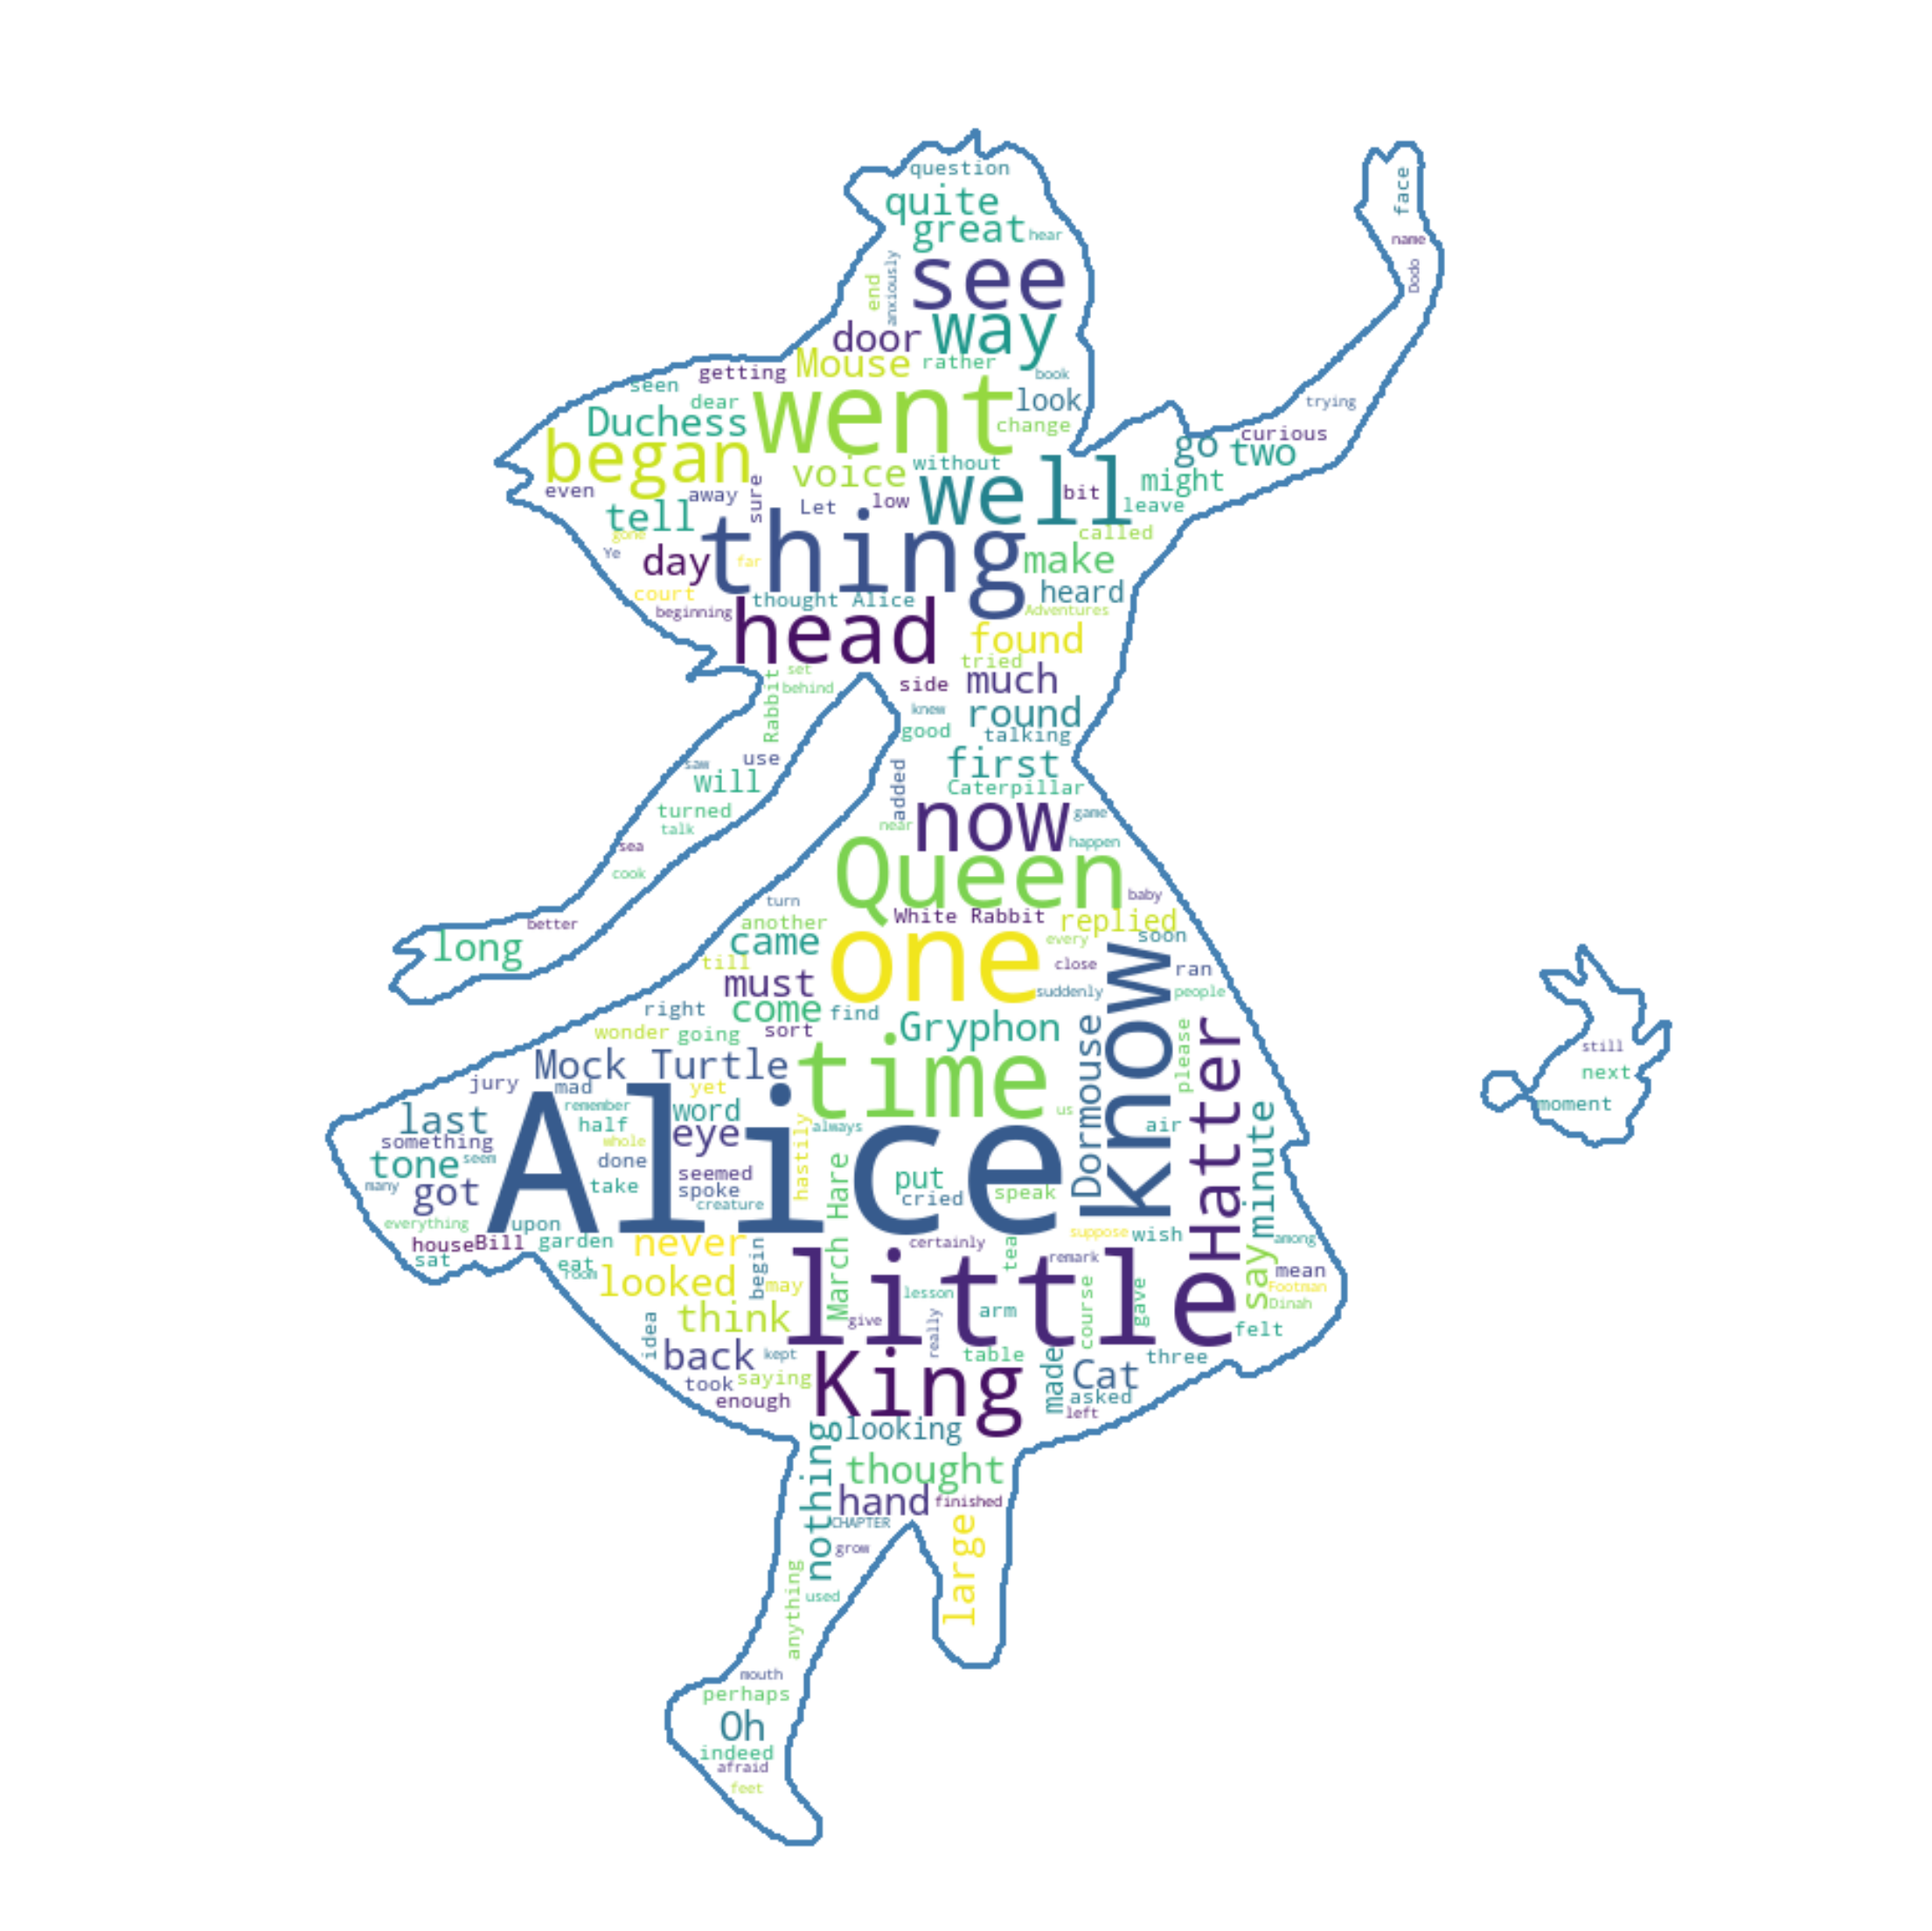

In [13]:
alice_masked_wc = WordCloud(background_color="white", mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')
# generate the word cloud
alice_masked_wc.generate(alice_text)
# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_masked_wc, interpolation='bilinear')
plt.axis('off')
plt.show()